In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read data

In [12]:
import pandas as pd
import torch

In [13]:
raw_data = pd.read_excel('./data/24h-1-new.xlsx')
raw_data.head()

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Density current,# VNF Receive current,# VNF Density future,# VNF Receive future
0,0.0,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1.0,0.246,36.9,0.06,0.006,0.9,1.8,1.8,2.0,1.0,1.0,0.0,3.0,0.0,9.0
2,2.0,0.738,24.6,0.18,0.018,0.6,5.4,5.4,9.0,1.0,1.0,0.0,9.0,0.0,10.0
3,3.0,0.820,24.6,0.20,0.020,0.6,6.0,6.0,10.0,1.0,1.0,0.0,10.0,0.0,14.0
4,4.0,1.148,24.6,0.28,0.028,0.6,8.4,8.4,14.0,1.0,1.0,0.0,14.0,0.0,10.0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    raw_data.drop(columns='# VNF Density current'),
    raw_data['# VNF Density current'],
    test_size=0.25, random_state=42, shuffle=False)

X_train.head()

,Time,CPU edge average (1),CPU edge average (2),CPU server average,BW edge (1),BW edge (1).1,BW server (1),BW server (2),# edge device,# links (1),# links (2),# VNF Receive current,# VNF Density future,# VNF Receive future
0,0.0,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1.0,0.246,36.9,0.06,0.006,0.9,1.8,1.8,2.0,1.0,1.0,3.0,0.0,9.0
2,2.0,0.738,24.6,0.18,0.018,0.6,5.4,5.4,9.0,1.0,1.0,9.0,0.0,10.0
3,3.0,0.820,24.6,0.20,0.020,0.6,6.0,6.0,10.0,1.0,1.0,10.0,0.0,14.0
4,4.0,1.148,24.6,0.28,0.028,0.6,8.4,8.4,14.0,1.0,1.0,14.0,0.0,10.0


In [15]:
torch.Tensor(X_train.iloc[0].values)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.])

In [16]:
X_train.columns

Index(['Time ', 'CPU edge average (1)', 'CPU edge average (2)',
       'CPU server average', 'BW edge (1)', 'BW edge (1).1', 'BW server (1)',
       'BW server (2)', '# edge device', '# links (1)', '# links (2)',
       '# VNF Receive current', '# VNF Density future',
       '# VNF Receive future'],
      dtype='object')

## Model

In [17]:
seq_len = 24

In [18]:
from fil_lstm import FILDataset
train_dataset = FILDataset(X_train, Y_train, sequence_length=seq_len)
test_dataset = FILDataset(X_test, Y_test, sequence_length=seq_len)

In [19]:
from fil_lstm import Model
model = Model(input_size=11, hidden_size=64, num_layers=1, dropout=0.5, sequence_length=seq_len)

/Users/nghiadanh/miniforge3/envs/tf_m1/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [20]:
model.train(train_dataset, test_dataset, epochs=100, batch_size=20, lr=0.001)

Epoch: 0 	 Train loss:  (610.8677485757453, -0.48884838776891937) 	 Test loss:  (667.5381777471607, -0.582482546055741)
Epoch: 5 	 Train loss:  (151.98998990476315, 0.9078307539532838) 	 Test loss:  (170.35034556576338, 0.8969441328882386)
Epoch: 10 	 Train loss:  (45.57641355631496, 0.9917122554890802) 	 Test loss:  (74.42518330616493, 0.9803289989295628)
Epoch: 15 	 Train loss:  (31.554485368565274, 0.9960273684107336) 	 Test loss:  (47.38620981740758, 0.992025735296198)
Epoch: 20 	 Train loss:  (23.36289950417515, 0.9978222424255764) 	 Test loss:  (30.90453973402411, 0.9966081919879232)
Epoch: 25 	 Train loss:  (19.10713029155649, 0.9985433775061985) 	 Test loss:  (29.821636727212738, 0.9968417270420518)
Epoch: 30 	 Train loss:  (17.40376984546694, 0.9987915108969334) 	 Test loss:  (26.989541748046246, 0.9974131115322968)
Epoch: 35 	 Train loss:  (16.249385880823503, 0.9989465110943143) 	 Test loss:  (25.70060540462155, 0.9976542948819569)
Epoch: 40 	 Train loss:  (15.49042239692502

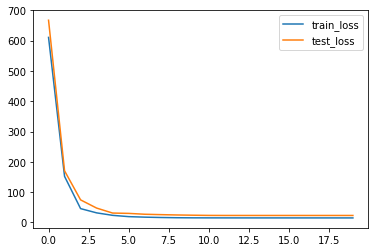

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(model.losses)[:,0], label='train_loss')
plt.plot(np.array(model.losses)[:,1], label='test_loss')
plt.legend()
plt.show()

In [22]:
np.array(model.losses).shape

(20, 2)

In [25]:
# Save as TorchScript
# x_test = torch.zeros((1,seq_len,11))
# traced_model = torch.jit.trace(model, (x_test, model.init_state()))
# traced_model.save('./model/torch_script/model_script_1.zip')

In [27]:
# traced_model.code

'def forward(self,\n    x: Tensor,\n    prev_state: Tuple[Tensor, Tensor]) -> Tuple[Tensor, Tuple[Tensor, Tensor]]:\n  relu = self.relu\n  fc = self.fc\n  relu1 = self.relu1\n  fc1 = self.fc1\n  lstm = self.lstm\n  hx, hx0, = prev_state\n  _0, _1, _2, = (lstm).forward(x, hx, hx0, )\n  _3 = (relu1).forward((fc1).forward(_0, ), )\n  _4 = torch.slice((relu).forward((fc).forward(_3, ), ), 0, 0, 9223372036854775807)\n  _5 = torch.slice(torch.select(_4, 1, -1), 1, 0, 9223372036854775807)\n  return (_5, (_1, _2))\n'

In [20]:
# torch.save(model.state_dict(), './model/best_1')
# torch.save(model, './model/best_1_full')

In [21]:
loaded_model = torch.load('./model/best_1_full')

In [22]:
loaded_model.evaluate(train_dataset, batch_size=len(X_train))

(16.77397330449533, 0.9988773924033071)

In [23]:
loaded_model.evaluate(test_dataset, batch_size=len(X_test))

(22.270888221133056, 0.9982385847189987)